In [35]:
import evaluate
import json
from tqdm import tqdm
import os
from matplotlib import pyplot as plt

rouge = evaluate.load('rouge')
bleu = evaluate.load('bleu')
meteor = evaluate.load('meteor')

def evaluate_list(gens, refs):
    rouge_score = rouge.compute(predictions=gens, references=refs)
    bleu_score = None # bleu.compute(predictions=gens, references=refs)
    meteor_score = meteor.compute(predictions=gens, references=refs)
    return rouge_score, bleu_score, meteor_score

[nltk_data] Downloading package wordnet to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /afs/cs.stanford.edu/u/yuhuiz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [36]:
file2metric = {}
file_names = sorted(os.listdir("cache"))
for file_name in tqdm(file_names):
    if not file_name.endswith(".json"): continue
    with open(os.path.join("cache", file_name), "r") as f:
        gens, refs = json.load(f)
    gens, refs = gens[0], refs[0]
    gens = [gen.replace("<|endoftext|>", "").strip() for gen in gens]
    # print(gens[:2], refs[:2])
    metrics = evaluate_list(gens, refs)
    file2metric[file_name] = metrics

100%|██████████| 400/400 [13:36<00:00,  2.04s/it]


In [37]:
file2rougel = {}

for key, value in file2metric.items():
    items = key.replace(".json", "").split("_")
    modality, method, epoch = items[2], items[-3], int(items[-1])
    if (modality, method) not in file2rougel:
        file2rougel[(modality, method)] = [None] * 50
    # print(value[0])
    # file2rougel[(modality, method)][epoch - 1] = value[0]["rougeL"]
    file2rougel[(modality, method)][epoch - 1] = value[2]["meteor"]

('audio', 'c1') 0.1728274203050502
('audio', 'c21') 0.1999813746098
('audio', 'c22') 0.20048686204558605
('audio', 'c3') 0.20077125931832723
('video', 'c1') 0.12614111495942357
('video', 'c21') 0.17831839832092852
('video', 'c22') 0.18071932023863174
('video', 'c3') 0.200264651484797


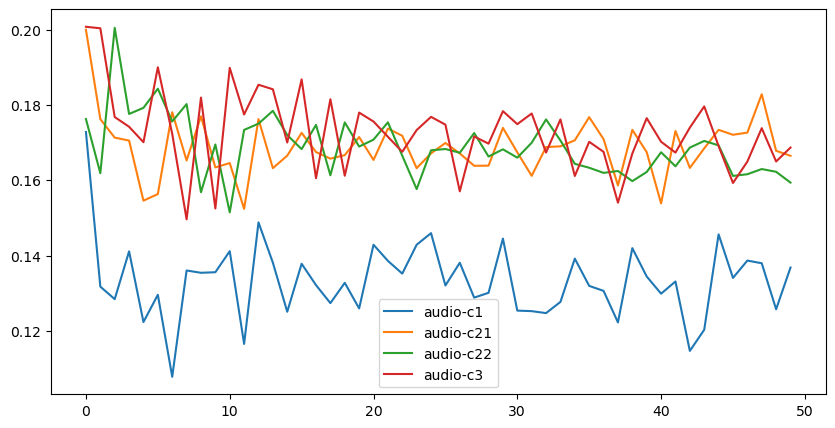

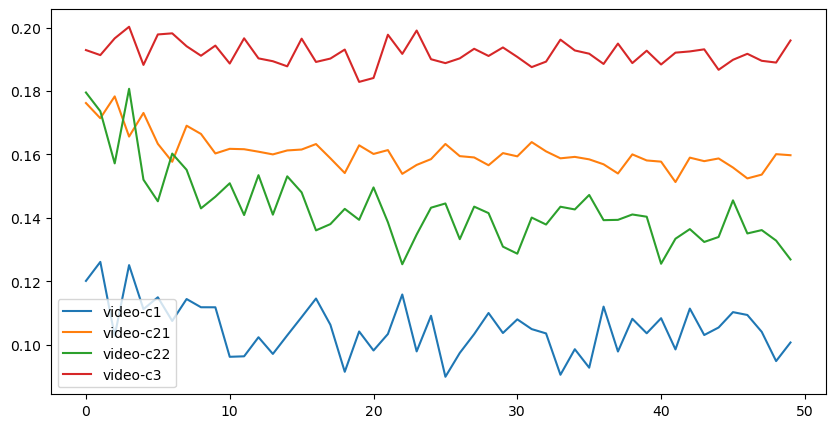

In [38]:
plt.figure(figsize=(10, 5))
for key, value in file2rougel.items():
    if "audio" in key:
        plt.plot(value, label=f"{key[0]}-{key[1]}")
        print(key, max(value))
plt.legend()

plt.figure(figsize=(10, 5))
for key, value in file2rougel.items():
    if "video" in key:
        plt.plot(value, label=f"{key[0]}-{key[1]}")
        print(key, max(value))
plt.legend()